Epoch 1/10
310/310 [==============================] - 4s 9ms/step - loss: nan - accuracy: 0.9970 - val_loss: nan - val_accuracy: 0.9968
Epoch 2/10
310/310 [==============================] - 4s 13ms/step - loss: nan - accuracy: 0.9970 - val_loss: nan - val_accuracy: 0.9968
Epoch 3/10
310/310 [==============================] - 3s 10ms/step - loss: nan - accuracy: 0.9970 - val_loss: nan - val_accuracy: 0.9968
Epoch 4/10
310/310 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.9970 - val_loss: nan - val_accuracy: 0.9968
Epoch 5/10
310/310 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.9970 - val_loss: nan - val_accuracy: 0.9968
Epoch 6/10
310/310 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.9970 - val_loss: nan - val_accuracy: 0.9968
Epoch 7/10
310/310 [==============================] - 4s 14ms/step - loss: nan - accuracy: 0.9970 - val_loss: nan - val_accuracy: 0.9968
Epoch 8/10
310/310 [=========================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


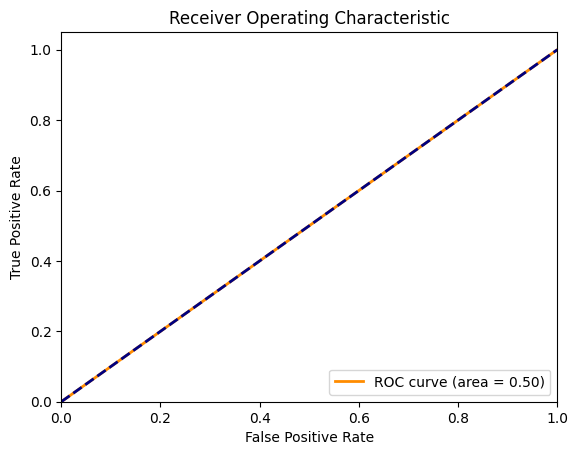

In [ ]:
#optimised Code for CNN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam

# Load the dataset
dataset = pd.read_csv("creditcard.csv")

# Split the data into features (X) and target (y)
X = dataset.drop(columns=["Class"])
y = dataset["Class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for Conv1D
X_train_scaled = X_train_scaled[:, :, np.newaxis]
X_test_scaled = X_test_scaled[:, :, np.newaxis]

# Hyperparameters
num_filters = 64
kernel_size = 5
pool_size = 2
dense_units = 128
learning_rate = 0.001
epochs = 10
batch_size = 128

# Define the model
model = Sequential()
model.add(Conv1D(filters=num_filters, kernel_size=kernel_size, activation="relu", input_shape=(X_train_scaled.shape[1], 1)))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(Flatten())
model.add(Dense(units=dense_units, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
model.add(Dense(units=1, activation="sigmoid"))


# Compile the model
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_scaled, y_test))

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

# Handle NaNs in y_test
if np.isnan(y_test).any():
    valid_indices = ~np.isnan(y_test)
    y_test = y_test[valid_indices]
    y_pred_binary = y_pred_binary[valid_indices]

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

# Accuracy Score
from sklearn.metrics import accuracy_score
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_binary)}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_binary)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_binary)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten

# Load the dataset
dataset = pd.read_csv("creditcard.csv")

# Split the data into features (X) and target (y)
X = dataset.drop(columns=["Class"])
y = dataset["Class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for Conv1D
X_train_scaled = X_train_scaled[:, :, np.newaxis]
X_test_scaled = X_test_scaled[:, :, np.newaxis]

# Define the model
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation="relu", input_shape=(X_train_scaled.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test))

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

# Handle NaNs in y_test
if np.isnan(y_test).any():
    valid_indices = ~np.isnan(y_test)
    y_test = y_test[valid_indices]
    y_pred_binary = y_pred_binary[valid_indices]
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

# Accuracy Score
from sklearn.metrics import accuracy_score
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_binary)}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Epoch 1/10
147/147 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.9989 - val_loss: nan - val_accuracy: 1.0000
Epoch 2/10
147/147 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.9991 - val_loss: nan - val_accuracy: 1.0000
Epoch 3/10
147/147 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.9991 - val_loss: nan - val_accuracy: 1.0000
Epoch 4/10
147/147 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.9991 - val_loss: nan - val_accuracy: 1.0000
Epoch 5/10
147/147 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.9991 - val_loss: nan - val_accuracy: 1.0000
Epoch 6/10
147/147 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.9991 - val_loss: nan - val_accuracy: 1.0000
Epoch 7/10
147/147 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.9991 - val_loss: nan - val_accuracy: 1.0000
Epoch 8/10
147/147 [============================

ValueError: Input contains NaN.